PERRET / MORI / DUPONT / POTIRON
# Projet Bayes: 

In [1]:
#Bibliothèques
import numpy as np
import numpy.random as rnd
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
#Import des données
N = 12
T = np.array([11, 11, 17, 22, 9, 6, 5, 14, 9, 7, 22, 51])
X = np.array([6, 9, 17, 22, 7, 5, 5, 14, 9, 7, 9, 51])
Y = np.array([5, 2, 0, 0, 2, 1, 0, 0, 0, 0, 13, 0])

In [3]:
#Fonctions utiles
Sigmoid = lambda x: 1/(1+np.exp(-x))

Alpha: mean=-0.4781135040319621, sd=0.27901632615143085, val2.5pc=-1.0643348338988627 , median =-0.4677309749180847, val97.5pc=0.040121591265409255, start=1001, sample=10000
Beta: mean=0.6441609607300892, sd=0.17866380738991777, val2.5pc=0.34495723236009423, median =0.6264220242357798, val97.5pc=1.0409373371678612, start=1001, sample=10000
Delta: mean=0.31205413272163113, sd=0.6247315274051466, val2.5pc=-0.884749090681333, median =0.3000879166576396, val97.5pc=1.6142813862591183, start=1001, sample=10000
Theta: mean=0.5708478274508781, sd=0.140027535706063, val2.5pc=0.2921946284635782, median =0.5744640086096431, val97.5pc=0.8340049523951649, start=1001, sample=10000
P: mean=0.38483950259243765, sd=0.06462922776073246, val2.5pc=0.2564819341823226, median =0.3851534318260302, val97.5pc=0.510029052494848, start=1001, sample=10000


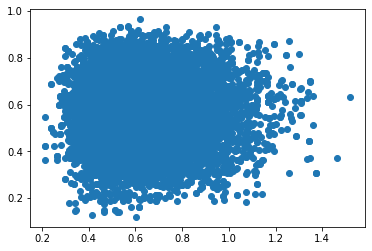

In [28]:
n = 11000
dim_param = 2
t_chauffe = 1001

#Lois à prioris
prior_alpha_sd = 1e4
prior_delta_sd = 1e4

#Marches aléatoires
alpha_MH_sd = 0.4
delta_MH_sd = 1.2

#On sépare les données en y=0/y<>0
X_0 = X[Y == 0]
X_1 = X[Y != 0]
Y_0 = Y[Y == 0]
Y_1 = Y[Y != 0]
T_0 = T[Y == 0]
T_1 = T[Y != 0]

#Création de theta = [alpha, delta]
param_0 = [0.0 for k in range(dim_param)]
param = np.array([param_0]*(n+1))

#Mise en route
for t in range(1,n+1):
    param[t] = param[t-1]
    
    #Propositions 
    Alpha = param[t][0]
    Alpha_star = rnd.normal(loc=Alpha, scale=alpha_MH_sd)
    Delta = param[t][1]
    Delta_star = rnd.normal(loc=Delta, scale=1.2)
    
    #Remise à l'échelle
    P = Sigmoid(Alpha)
    P_star = Sigmoid(Alpha_star)
    Theta = Sigmoid(Delta)
    Theta_star = Sigmoid(Delta_star)
    
    #Alpha
    top = (np.log(Theta + (1-Theta)*(1-P_star)**T_0)).sum() + (Y_1*np.log(P_star)+X_1*np.log(1-P_star)).sum() - Alpha_star**2/(2*prior_alpha_sd)
    bottom = (np.log(Theta + (1-Theta)*(1-P)**T_0)).sum() + (Y_1*np.log(P)+X_1*np.log(1-P)).sum() - Alpha**2/(2*prior_alpha_sd)
    proba_accep = min(1,np.exp(top-bottom))
    U = rnd.uniform(low=0,high=1)
    if U<proba_accep:
        param[t][0] = Alpha_star
        
    #Delta
    top = (np.log(Theta_star + (1-Theta_star)*(1-P)**T_0)).sum() + len(X_1)*np.log(1-Theta_star) - Delta_star**2/(2*prior_delta_sd)
    bottom = (np.log(Theta + (1-Theta)*(1-P)**T_0)).sum() + len(X_1)*np.log(1-Theta) - Delta**2/(2*prior_delta_sd)
    proba_accep = min(1,np.exp(top-bottom))
    U = rnd.uniform(low=0,high=1)
    if U<proba_accep:
        param[t][1] = Delta_star
    
plt.scatter(np.exp(param[:,0]),Sigmoid(param[:,1]))

Alpha = param[t_chauffe:,0]
Delta = param[t_chauffe:,1]
Beta = np.exp(param[t_chauffe:,0])
Theta = Sigmoid(param[t_chauffe:,1])
P = Sigmoid(param[t_chauffe:,0])

print(f"Alpha: mean={Alpha.mean()}, sd={Alpha.std()}, val2.5pc={np.quantile(Alpha,0.025)} , median ={np.median(Alpha)}, val97.5pc={np.quantile(Alpha,0.975)}, start={t_chauffe}, sample={len(Alpha)}")
print(f"Beta: mean={Beta.mean()}, sd={Beta.std()}, val2.5pc={np.quantile(Beta,0.025)}, median ={np.median(Beta)}, val97.5pc={np.quantile(Beta,0.975)}, start={t_chauffe}, sample={len(Beta)}")
print(f"Delta: mean={Delta.mean()}, sd={Delta.std()}, val2.5pc={np.quantile(Delta,0.025)}, median ={np.median(Delta)}, val97.5pc={np.quantile(Delta,0.975)}, start={t_chauffe}, sample={len(Delta)}")
print(f"Theta: mean={Theta.mean()}, sd={Theta.std()}, val2.5pc={np.quantile(Theta,0.025)}, median ={np.median(Theta)}, val97.5pc={np.quantile(Theta,0.975)}, start={t_chauffe}, sample={len(Theta)}")
print(f"P: mean={P.mean()}, sd={P.std()}, val2.5pc={np.quantile(P,0.025)}, median ={np.median(P)}, val97.5pc={np.quantile(P,0.975)}, start={t_chauffe}, sample={len(P)}")

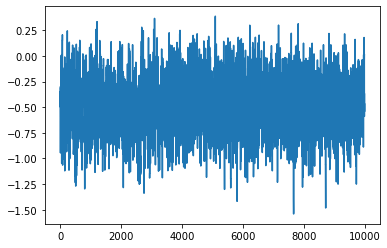

In [7]:
plt.plot(Alpha)

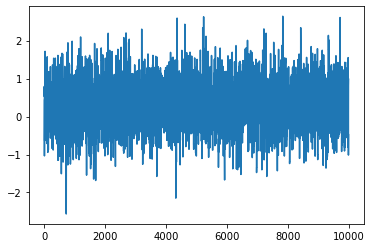

In [8]:
plt.plot(Delta)